### Example for using function load_data and printing dataset 

In [1]:
from hw3_utils import load_data
#downsample the training and validation dataset if needed, ds_rate should be larger than 1.
ds_rate=1.000001
datasets = load_data(ds_rate=ds_rate,theano_shared=False)
train_set_x, train_set_y = datasets[0]
valid_set_x, valid_set_y = datasets[1]
test_set_x, test_set_y = datasets[2]
print('Current training data size is %i'%train_set_x.shape[0])
print('Current validation data size is %i'%valid_set_x.shape[0])
print('Current test data size is %i'%test_set_x.shape[0])

Current training data size is 40000
Current validation data size is 9999
Current test data size is 10000


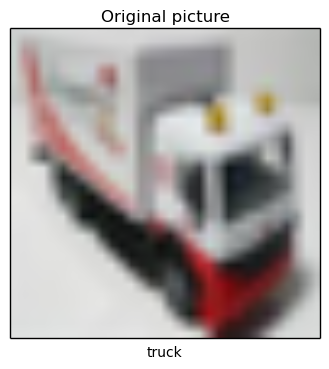

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
class_=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#Choose an image index
i=15
plt.imshow(np.reshape(valid_set_x[i],(3,32,32)).transpose(1,2,0))
plt.xticks([])
plt.yticks([])
plt.title('Original picture')
plt.xlabel('%s'%class_[valid_set_y[i]])

# ECBM E6040 Homework 3 - Programming Problem

### Problem 1: Implement the convolutional neural network depicted in this problem

In [3]:
from hw3 import test_lenet
test_lenet(learning_rate=0.1, n_epochs=300,nkerns=[32, 64], batch_size=500, verbose=True)

/usr/local/lib/python2.7/dist-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


AttributeError: 'numpy.ndarray' object has no attribute 'get_value'

### Problem 2: Bullet 1: Augmentation by translation

Show a 4*4 figure of 16 input images with this augmentation

In [ ]:
from hw3_utils import load_data
from hw3 import translate_image

Implement the neural network with this augmentation, show the improvement

In [ ]:
from hw3 import test_lenet_translation

### Problem 2: Bullet 2: Augmentation by rotation

Show a 4*4 figure of 16 input images with this augmentation

In [ ]:
from hw3_utils import load_data
from hw3 import rotate_image

Implement the neural network with this augmentation, show the improvement

In [ ]:
from hw3 import test_lenet_rotation

### Problem 2: Bullet 3: Augmentation by flipping

Show a 4*4 figure of 16 input images with this augmentation

In [ ]:
from hw3_utils import load_data
from hw3 import flip_image

Implement the neural network with this augmentation, show the improvement

In [ ]:
from hw3 import test_lenet_flip

### Problem 2: Bullet 4: Augmentation by injecting noise into input

Show a 4*4 figure of 16 input images with this augmentation

In [ ]:
from hw3_utils import load_data
from hw3 import noise_injection

Implement the neural network with this augmentation, show the improvement

In [ ]:
from hw3 import test_lenet_inject_noise_input

### Problem 3: Implement your own achritecture to achieve at least 80% testing accuracy on CIFAR-10 test set

In [ ]:
from hw3 import MY_lenet

### Problem 4: Implement the convolutional neural network depicted in this problem

In [ ]:
from hw3 import MY_CNN